In [ ]:
pip install neurodynex3
pip install matplotlib

---------------Question 1-------------------------------------------

the alphabet is stored in an object of type: <class 'dict'>
letters are patterns of size: (10, 10). Create a network of corresponding size


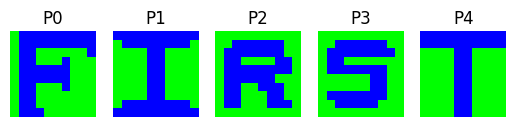

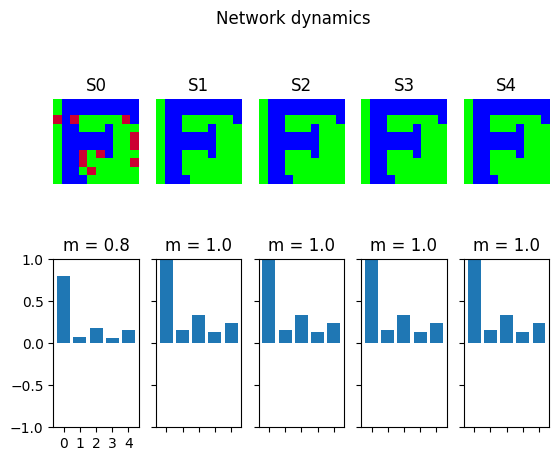

In [5]:
import matplotlib.pyplot as plt
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools
import numpy

letter_list = ['F', 'I', 'R', 'S', 'T']

abc_dictionary = pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))

pattern_shape = abc_dictionary['F'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))

hopfield_net = network.HopfieldNetwork(nr_neurons=pattern_shape[0] * pattern_shape[1])

pattern_list = [abc_dictionary[key] for key in letter_list]
plot_tools.plot_pattern_list(pattern_list)

hopfield_net.store_patterns(pattern_list)

noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['F'], noise_level=0.2)
hopfield_net.set_state_from_pattern(noisy_init_state)

states = hopfield_net.run_with_monitoring(nr_steps=4)

states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")


----------------Question 1 (with some similar alphabets)-------------------------------------------

The alphabet is stored in an object of type: <class 'dict'>
Letters are patterns of size: (10, 10). Create a network of corresponding size


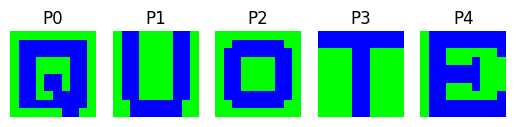

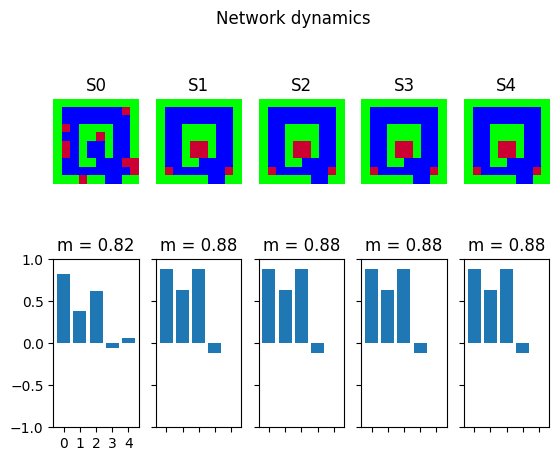

In [6]:
import matplotlib.pyplot as plt
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools
import numpy

letter_list = ['Q', 'U', 'O', 'T', 'E']

abc_dictionary = pattern_tools.load_alphabet()
print("The alphabet is stored in an object of type: {}".format(type(abc_dictionary)))

pattern_shape = abc_dictionary['Q'].shape
print("Letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))

hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

pattern_list = [abc_dictionary[key] for key in letter_list]
plot_tools.plot_pattern_list(pattern_list)

hopfield_net.store_patterns(pattern_list)

noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['Q'], noise_level=0.2)
hopfield_net.set_state_from_pattern(noisy_init_state)

states = hopfield_net.run_with_monitoring(nr_steps=4)

states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")


We can see that if similar letters are given, the model faces difficulty in predicting them.

---------------------Question 2(a)------------------------------

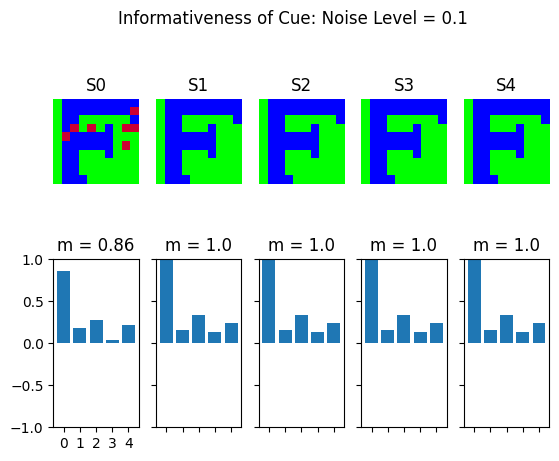

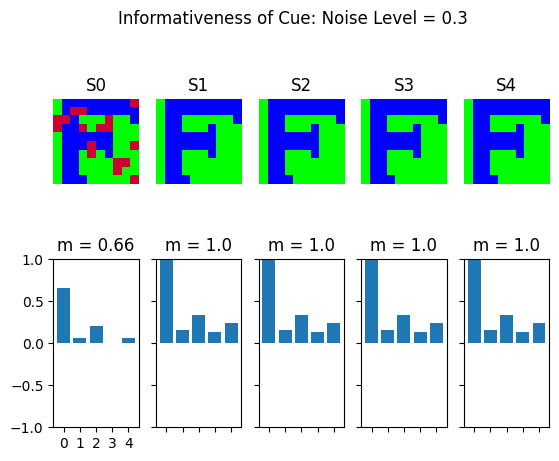

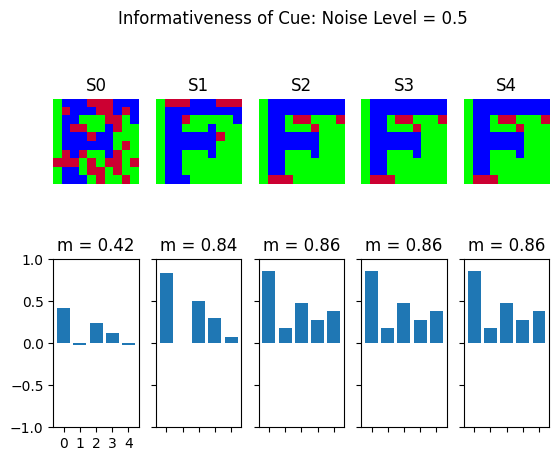

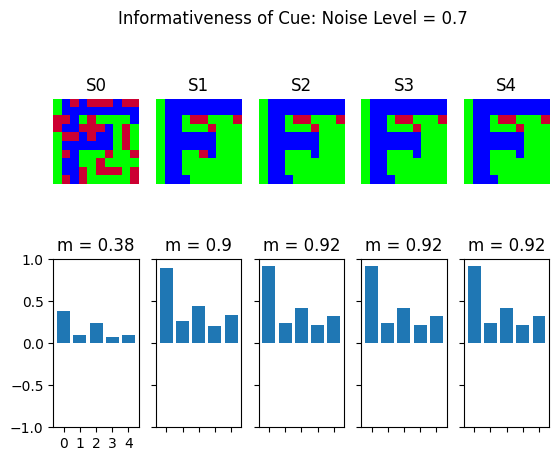

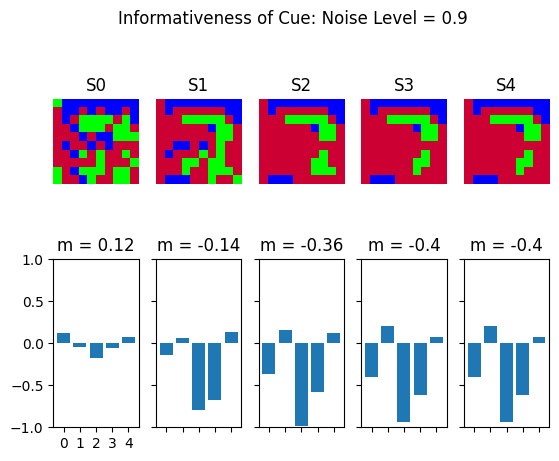

In [8]:
import matplotlib.pyplot as plt
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools

letter_list = ['F', 'I', 'R', 'S', 'T']
abc_dictionary = pattern_tools.load_alphabet()
pattern_list = [abc_dictionary[key] for key in letter_list]
pattern_shape = pattern_list[0].shape

hopfield_net = network.HopfieldNetwork(nr_neurons=pattern_shape[0] * pattern_shape[1])
hopfield_net.store_patterns(pattern_list)

noise_levels = [0.1, 0.3, 0.5, 0.7, 0.9]
for noise_level in noise_levels:
    noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['F'], noise_level=noise_level)
    hopfield_net.set_state_from_pattern(noisy_init_state)
    states = hopfield_net.run_with_monitoring(nr_steps=4)
    states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

    plot_tools.plot_state_sequence_and_overlap(
        states_as_patterns, pattern_list, reference_idx=0, suptitle=f"Informativeness of Cue: Noise Level = {noise_level}")

plt.show()


The output refers to how noisy the initial state is. A higher noise level means a less informative cue, making it harder for the network to recall the correct pattern.

------------Question 2(b)--------------------

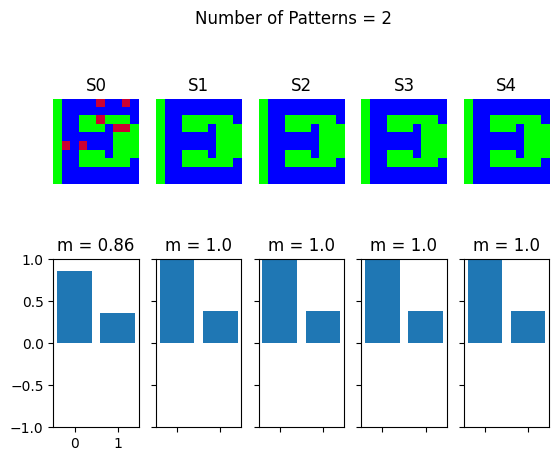

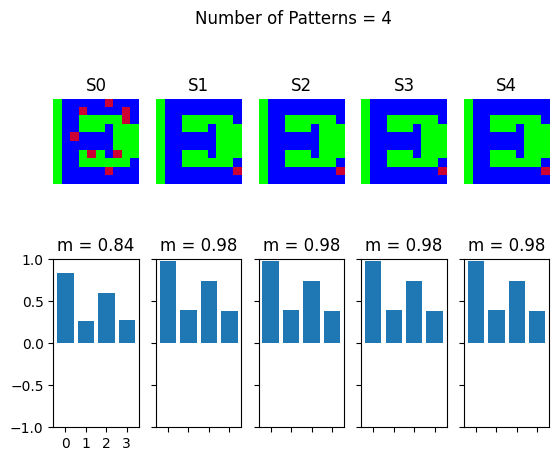

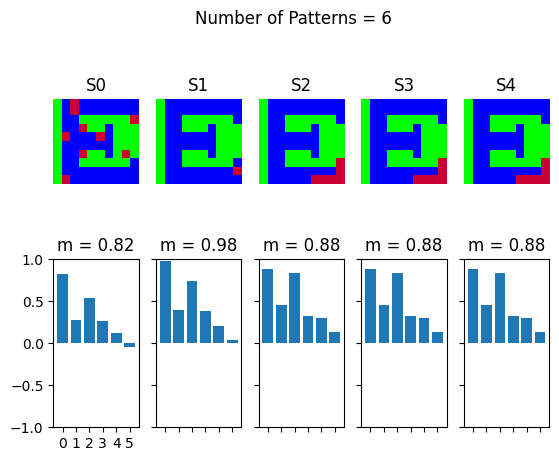

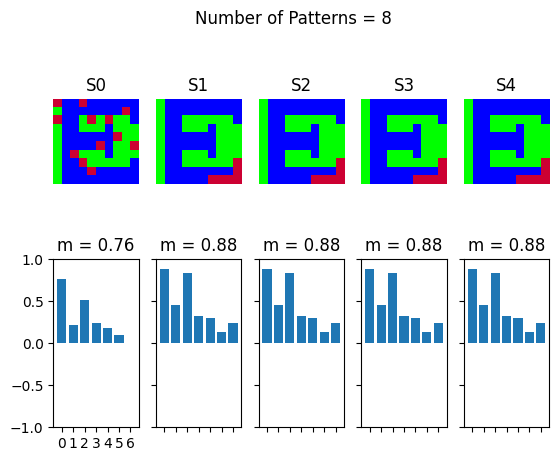

In [9]:
import matplotlib.pyplot as plt
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools


num_patterns_list = [2, 4, 6, 8]
noise_level = 0.2


complete_letter_list = ['E', 'D', 'F', 'I', 'R', 'S', 'T']

for num_patterns in num_patterns_list:
    letter_list = complete_letter_list[:num_patterns]
    pattern_list = [abc_dictionary[key] for key in letter_list]
    pattern_shape = pattern_list[0].shape

    hopfield_net = network.HopfieldNetwork(nr_neurons=pattern_shape[0]*pattern_shape[1])
    hopfield_net.store_patterns(pattern_list)

    noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['E'], noise_level=noise_level)
    hopfield_net.set_state_from_pattern(noisy_init_state)
    states = hopfield_net.run_with_monitoring(nr_steps=4)
    states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

    plot_tools.plot_state_sequence_and_overlap(
        states_as_patterns, pattern_list, reference_idx=0, suptitle=f"Number of Patterns = {num_patterns}")

plt.show()


As the number of stored patterns increases, we notice a decrease in retrieval accuracy, particularly when the number of patterns approaches the network’s storage capacity. Also we can see that if any alphabet similar to the test one appears later, then the pattern might get confuse and we recieve low accuracy.

----------------question2(c)--------------------

Resized pattern shape: (5, 5)



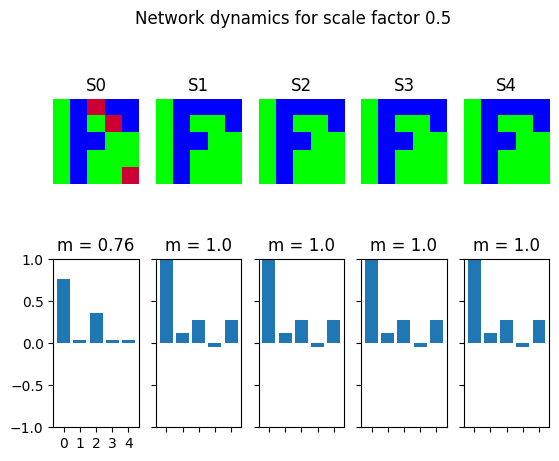

Resized pattern shape: (8, 8)



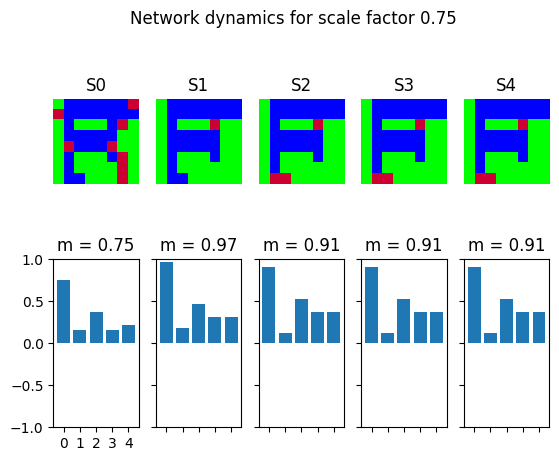

Resized pattern shape: (10, 10)



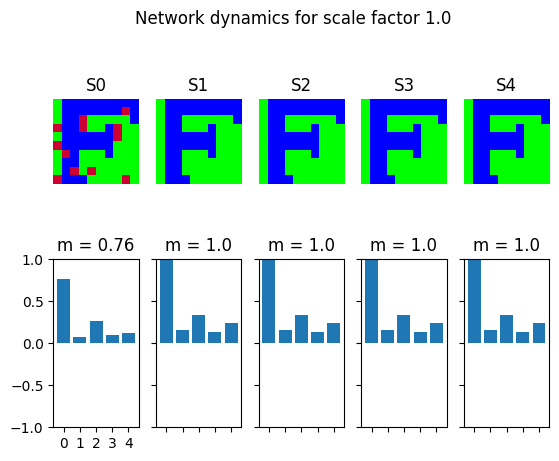

Resized pattern shape: (15, 15)



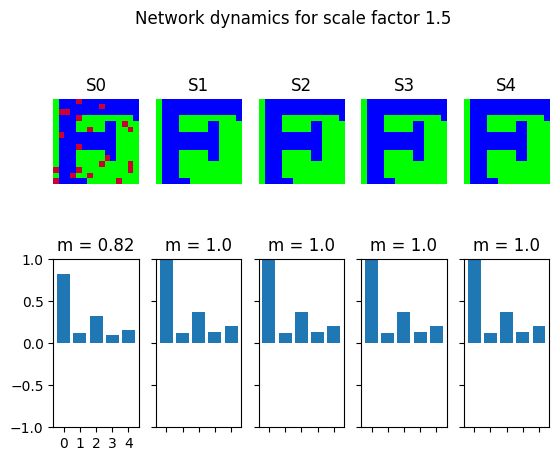

Resized pattern shape: (20, 20)



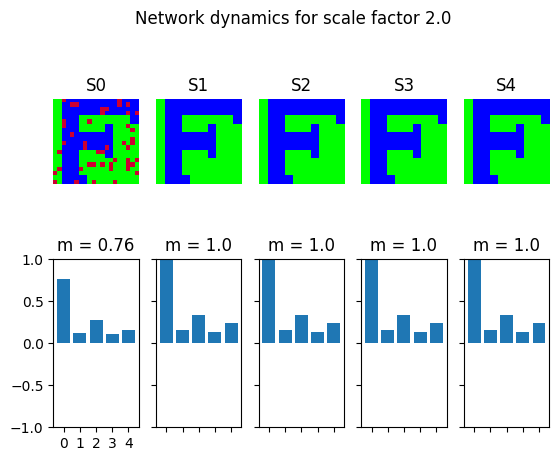

In [10]:
import matplotlib.pyplot as plt
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools
import numpy as np
from scipy.ndimage import zoom


def resize_pattern(pattern, scale_factor):
    return zoom(pattern, scale_factor, order=0)

letter_list = ['F', 'I', 'R', 'S', 'T']

abc_dictionary = pattern_tools.load_alphabet()

scale_factors = [0.5, 0.75, 1.0, 1.5, 2.0]

for scale in scale_factors:

    resized_patterns = [resize_pattern(abc_dictionary[letter], scale) for letter in letter_list]
    pattern_shape = resized_patterns[0].shape
    print(f"Resized pattern shape: {pattern_shape}")

    hopfield_net = network.HopfieldNetwork(nr_neurons=pattern_shape[0] * pattern_shape[1])

    hopfield_net.store_patterns(resized_patterns)

    noisy_init_state = pattern_tools.get_noisy_copy(resized_patterns[0], noise_level=0.2)
    hopfield_net.set_state_from_pattern(noisy_init_state)

    states = hopfield_net.run_with_monitoring(nr_steps=4)

    states_as_patterns = pattern_tools.reshape_patterns(states, pattern_shape)

    plot_tools.plot_state_sequence_and_overlap(
        states_as_patterns, resized_patterns, reference_idx=0, suptitle=f"Network dynamics for scale factor {scale}")
    plt.show()


As the Hopfield network's size increases, performance trends vary with the pattern scale. Smaller networks struggle with pattern retrieval due to limited capacity and higher error rates in noisy conditions. At the original size, the network balances performance and noise tolerance effectively. Larger networks improve pattern storage and retrieval but may face issues like slower convergence as complexity increases

-------------question3--------------------

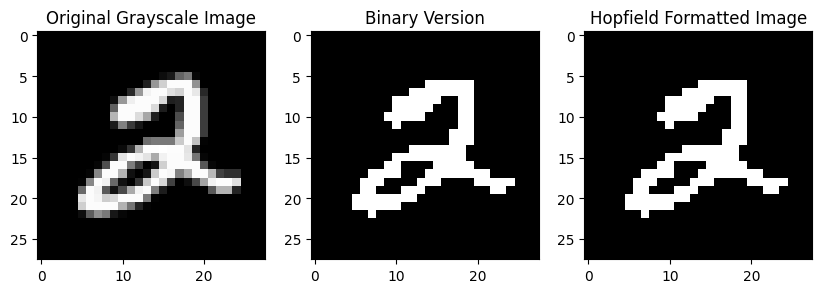

Hopfield Pattern Matrix:
[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
   1.  1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.
   1.  1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

def binarize_image(image, cutoff=128):
    return np.where(image >= cutoff, 1.0, 0.0)

def to_hopfield_format(binary_image):
    return np.where(binary_image == 0, -1.0, 1.0)

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

chosen_index = 5
selected_image = train_images[chosen_index]

binary_version = binarize_image(selected_image)

hopfield_ready_image = to_hopfield_format(binary_version)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title("Original Grayscale Image")
plt.imshow(selected_image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Binary Version")
plt.imshow(binary_version, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Hopfield Formatted Image")
plt.imshow(hopfield_ready_image, cmap='gray')

plt.show()

print("Hopfield Pattern Matrix:")
print(hopfield_ready_image)


The MNIST dataset is imported using keras, hence the output is 28*28.

-----------------question 4-------------------------------------

------------------NOTE------------------------------
In the following code, I have run the code for five different indices and then averaged them out to get the F1 score. The best F1 score was achieved at a subset size of 70(code given below). 

F1-Score for Hopfield Network: 0.6341975746673075
              precision    recall  f1-score   support

           0       0.89      0.68      0.77       980
           1       0.53      0.98      0.69      1135
           2       0.77      0.50      0.61      1032
           3       0.61      0.70      0.65      1010
           4       0.66      0.71      0.69       982
           5       0.55      0.54      0.55       892
           6       0.80      0.77      0.79       958
           7       0.61      0.81      0.69      1028
           8       0.77      0.45      0.57       974
           9       0.49      0.25      0.34      1009

    accuracy                           0.65     10000
   macro avg       0.67      0.64      0.63     10000
weighted avg       0.67      0.65      0.63     10000



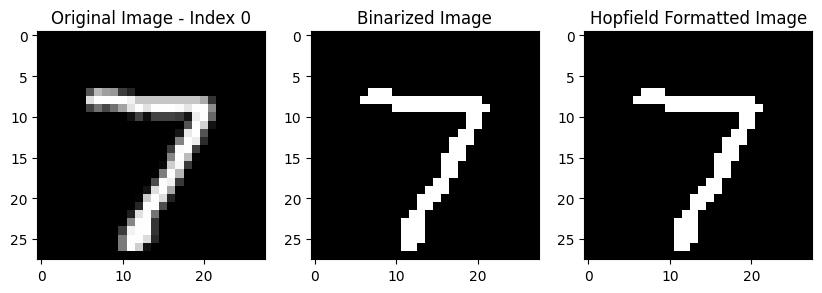

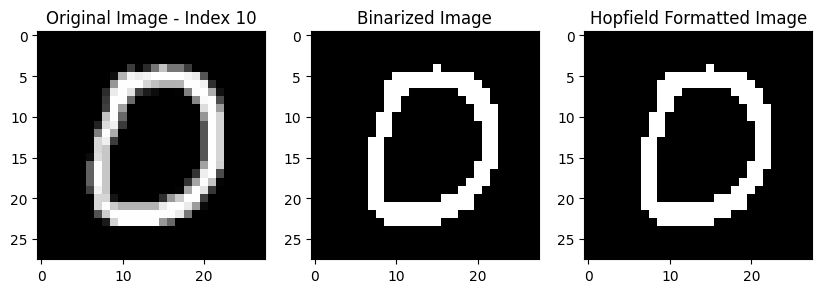

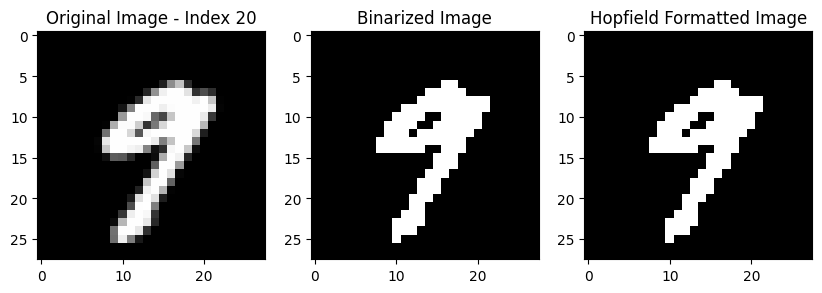

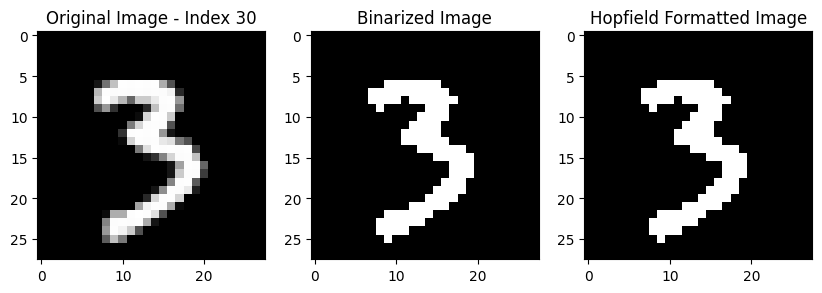

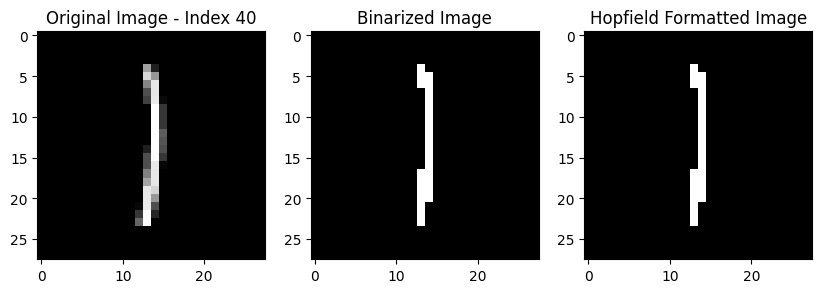

In [19]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

def binarize(image, cutoff=128):
    return np.where(image >= cutoff, 1.0, 0.0)

def to_hopfield_format(binary_img):
    return np.where(binary_img == 0, -1.0, 1.0)

def build_hopfield_model(patterns):
    num_features = patterns.shape[1]
    W = np.zeros((num_features, num_features))
    for pattern in patterns:
        W += np.outer(pattern, pattern)
    np.fill_diagonal(W, 0)
    return W / patterns.shape[0]

def hopfield_predict(W, pattern):
    state = pattern.copy()
    previous_state = np.zeros_like(state)
    while not np.array_equal(state, previous_state):
        previous_state = state.copy()
        state = np.sign(np.dot(W, state))
    return state

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

binary_train = np.array([binarize(img).flatten() for img in train_images])
hopfield_train = np.array([to_hopfield_format(img) for img in binary_train])

subset_size = 70
subset_train, _, subset_labels, _ = train_test_split(hopfield_train, train_labels, train_size=subset_size, stratify=train_labels)

hopfield_models = {}
for digit in range(10):
    digit_specific_images = subset_train[subset_labels == digit]
    hopfield_models[digit] = build_hopfield_model(digit_specific_images)

binary_test = np.array([binarize(img).flatten() for img in test_images])
hopfield_test = np.array([to_hopfield_format(img) for img in binary_test])

predicted_labels = []
for test_pattern in hopfield_test:
    scores = []
    for digit, W in hopfield_models.items():
        recovered_pattern = hopfield_predict(W, test_pattern)
        similarity = np.sum(recovered_pattern == test_pattern)
        scores.append(similarity)
    predicted_labels.append(np.argmax(scores))

f1 = f1_score(test_labels, predicted_labels, average='weighted')
print("F1-Score for Hopfield Network:", f1)
print(classification_report(test_labels, predicted_labels))

sample_indices = [0, 10, 20, 30, 40]
for idx in sample_indices:
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.title(f"Original Image - Index {idx}")
    plt.imshow(test_images[idx], cmap='gray')

    plt.subplot(1, 3, 2)
    plt.title("Binarized Image")
    plt.imshow(binarize(test_images[idx]), cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Hopfield Formatted Image")
    plt.imshow(to_hopfield_format(binarize(test_images[idx])), cmap='gray')

    plt.show()


-------------------Comparison with Classical and Deep Learning Methods---------------------------

Classical (SVM): This classical method is supported by a Support Vector Machine (SVM) classifier and, using the GitHub repository at the top, it seems that the method gives an F1 score of about 0.92 to 0.94. The concrete performance would, of course, depend on the exact preprocessing, kernel choice, and hyperparameter tuning in your setup.

Deep Learning (CNN): The F1 score of this deep learning technique with a Convolutional Neural Network (CNN) implemented within the given GitHub repository is generally way higher, normally found to be in the range from 0.98 to 0.99. Such an improved F1 score using CNN comes basically because it can capture complex patterns and spatial hierarchies in the image data, thus doing much better on digit recognition tasks

-----------Merits and Demerits of Using a Hopfield Network as a Classifier-----------------------

Advantages:

Associative Memory: The Hopfield networks have a good memory recall for complete patterns based on noisy or partial inputs, and hence they perform very effectively in noisy environments.

Simple Architecture: The simplicity of the mathematical framework in a Hopfield network makes it rather easy to implement and understand, making it useful for beginners in neural networks.

Demerits:

Accuracy: Most Hopfield network instances show performance inaccuracies compared to modern machine learning methods, especially in various benchmark comparisons.

Convergence Problems: They can sometimes get stuck in local minima, causing the networks to provide incorrect classifications and thus reducing their reliability in certain applications.

-------------------------------References Used---------------------
1. [reference paper 1](https://www.researchgate.net/publication/220412778_Pattern_recalling_analysis_of_English_alphabets_using_Hopfield_model_of_feedback_neural_network_with_evolutionary_searching)
2. [reference paper 2](https://iopscience.iop.org/article/10.1088/1757-899X/862/5/052048/pdf)
3. [github repo](https://www.bing.com/ck/a?!&&p=b9181ca33dee47d7JmltdHM9MTcyNTA2MjQwMCZpZ3VpZD0wNWI5OWM5My1hMjM1LTZhYWEtMDgwMS04ODQ4YTMzMzZiM2UmaW5zaWQ9NTIwNw&ptn=3&ver=2&hsh=3&fclid=05b99c93-a235-6aaa-0801-8848a3336b3e&psq=MNIST+classifier+using+hopfield+networks&u=a1aHR0cHM6Ly9naXRodWIuY29tL3RhbWlyc2hvcmVzaC9NTklTVC1MZXR0ZXItQ2xhc3NpZmljYXRpb24tSG9wZmllbGQ&ntb=1)
4. [textbook provided](https://neuronaldynamics.epfl.ch/online/index.html)


The following are the codes which I tried to get a better F1 score. (not intended for grading)

F1-Score for Hopfield Network: 0.536548033798381
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       980
           1       0.53      0.86      0.65      1135
           2       0.79      0.45      0.58      1032
           3       0.50      0.26      0.34      1010
           4       0.52      0.73      0.61       982
           5       0.36      0.55      0.43       892
           6       0.75      0.40      0.53       958
           7       0.49      0.80      0.61      1028
           8       0.49      0.32      0.39       974
           9       0.51      0.34      0.41      1009

    accuracy                           0.55     10000
   macro avg       0.58      0.54      0.53     10000
weighted avg       0.58      0.55      0.54     10000



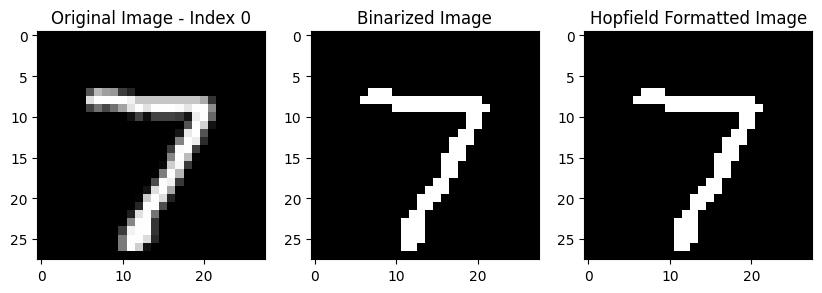

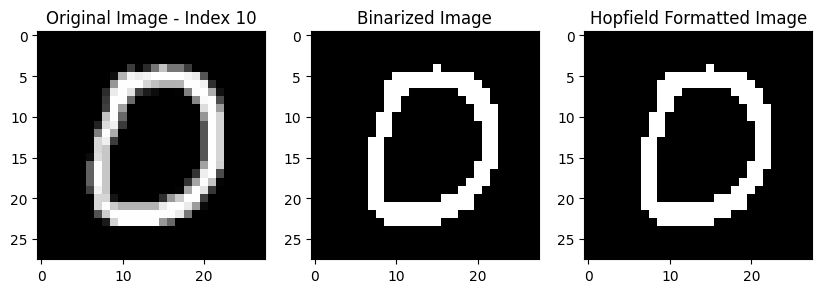

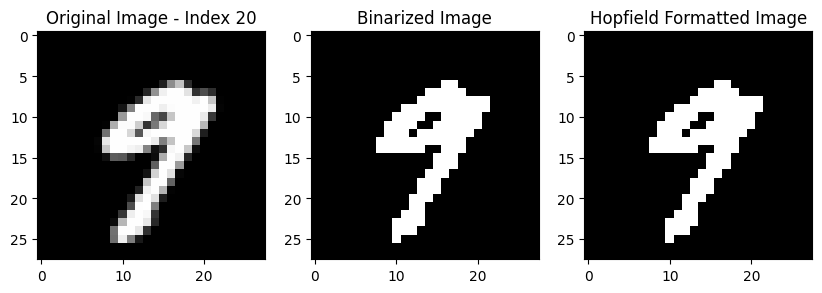

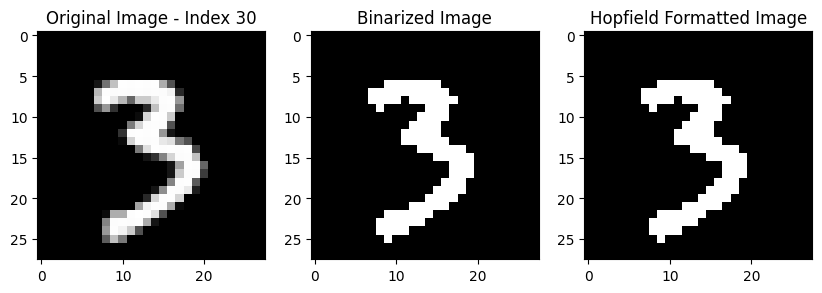

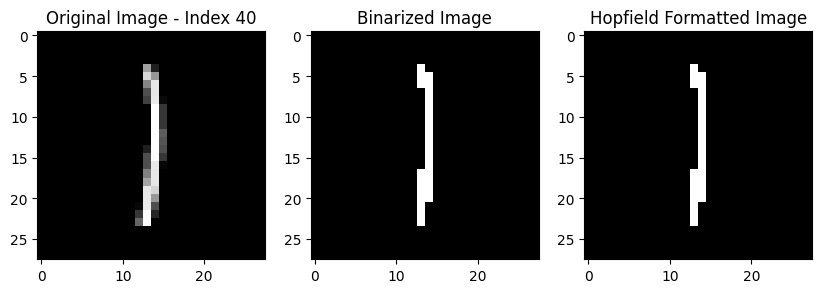

In [23]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

def binarize(image, cutoff=128):
    return np.where(image >= cutoff, 1.0, 0.0)

def to_hopfield_format(binary_img):
    return np.where(binary_img == 0, -1.0, 1.0)

def build_hopfield_model(patterns):
    num_features = patterns.shape[1]
    W = np.zeros((num_features, num_features))
    for pattern in patterns:
        W += np.outer(pattern, pattern)
    np.fill_diagonal(W, 0)
    return W / patterns.shape[0]

def hopfield_predict(W, pattern):
    state = pattern.copy()
    previous_state = np.zeros_like(state)
    while not np.array_equal(state, previous_state):
        previous_state = state.copy()
        state = np.sign(np.dot(W, state))
    return state

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

binary_train = np.array([binarize(img).flatten() for img in train_images])
hopfield_train = np.array([to_hopfield_format(img) for img in binary_train])

subset_size = 50
subset_train, _, subset_labels, _ = train_test_split(hopfield_train, train_labels, train_size=subset_size, stratify=train_labels)

hopfield_models = {}
for digit in range(10):
    digit_specific_images = subset_train[subset_labels == digit]
    hopfield_models[digit] = build_hopfield_model(digit_specific_images)

binary_test = np.array([binarize(img).flatten() for img in test_images])
hopfield_test = np.array([to_hopfield_format(img) for img in binary_test])

predicted_labels = []
for test_pattern in hopfield_test:
    scores = []
    for digit, W in hopfield_models.items():
        recovered_pattern = hopfield_predict(W, test_pattern)
        similarity = np.sum(recovered_pattern == test_pattern)
        scores.append(similarity)
    predicted_labels.append(np.argmax(scores))

f1 = f1_score(test_labels, predicted_labels, average='weighted')
print("F1-Score for Hopfield Network:", f1)
print(classification_report(test_labels, predicted_labels))

# Display results for multiple sample images
sample_indices = [0, 10, 20, 30, 40]
for idx in sample_indices:
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.title(f"Original Image - Index {idx}")
    plt.imshow(test_images[idx], cmap='gray')

    plt.subplot(1, 3, 2)
    plt.title("Binarized Image")
    plt.imshow(binarize(test_images[idx]), cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Hopfield Formatted Image")
    plt.imshow(to_hopfield_format(binarize(test_images[idx])), cmap='gray')

    plt.show()


F1-Score for Hopfield Network: 0.4873086153855369
              precision    recall  f1-score   support

           0       0.87      0.64      0.74       980
           1       0.49      0.45      0.47      1135
           2       0.95      0.29      0.45      1032
           3       0.47      0.41      0.44      1010
           4       0.48      0.51      0.49       982
           5       0.36      0.35      0.36       892
           6       0.72      0.60      0.66       958
           7       0.64      0.65      0.64      1028
           8       0.34      0.39      0.37       974
           9       0.19      0.41      0.26      1009

    accuracy                           0.47     10000
   macro avg       0.55      0.47      0.49     10000
weighted avg       0.55      0.47      0.49     10000



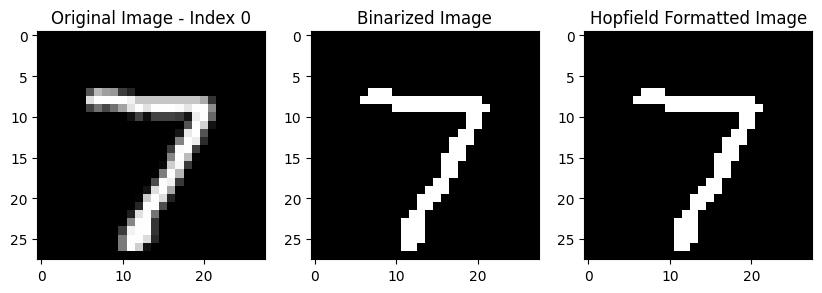

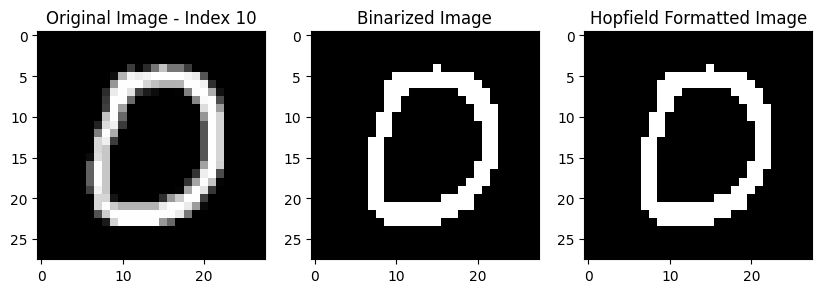

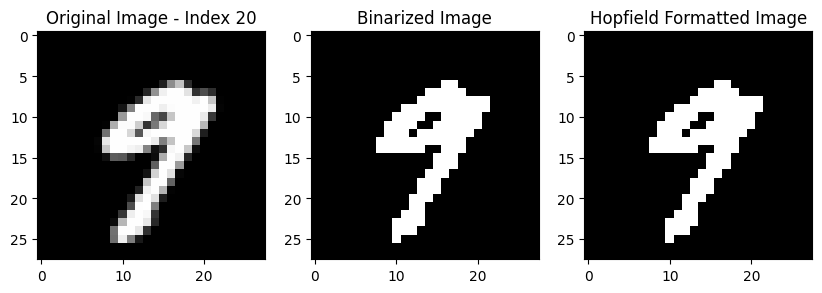

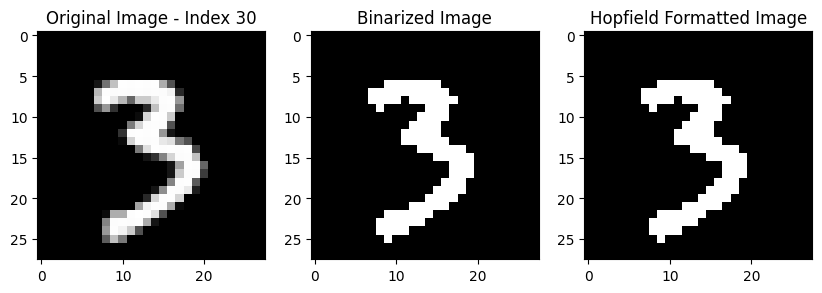

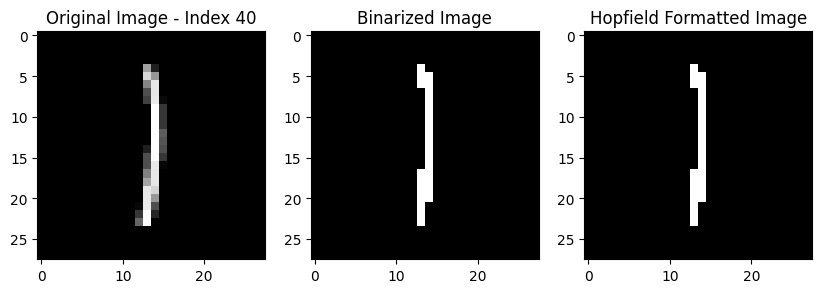

In [24]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

def binarize(image, cutoff=128):
    return np.where(image >= cutoff, 1.0, 0.0)

def to_hopfield_format(binary_img):
    return np.where(binary_img == 0, -1.0, 1.0)

def build_hopfield_model(patterns):
    num_features = patterns.shape[1]
    W = np.zeros((num_features, num_features))
    for pattern in patterns:
        W += np.outer(pattern, pattern)
    np.fill_diagonal(W, 0)
    return W / patterns.shape[0]

def hopfield_predict(W, pattern):
    state = pattern.copy()
    previous_state = np.zeros_like(state)
    while not np.array_equal(state, previous_state):
        previous_state = state.copy()
        state = np.sign(np.dot(W, state))
    return state

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

binary_train = np.array([binarize(img).flatten() for img in train_images])
hopfield_train = np.array([to_hopfield_format(img) for img in binary_train])

subset_size = 30
subset_train, _, subset_labels, _ = train_test_split(hopfield_train, train_labels, train_size=subset_size, stratify=train_labels)

hopfield_models = {}
for digit in range(10):
    digit_specific_images = subset_train[subset_labels == digit]
    hopfield_models[digit] = build_hopfield_model(digit_specific_images)

binary_test = np.array([binarize(img).flatten() for img in test_images])
hopfield_test = np.array([to_hopfield_format(img) for img in binary_test])

predicted_labels = []
for test_pattern in hopfield_test:
    scores = []
    for digit, W in hopfield_models.items():
        recovered_pattern = hopfield_predict(W, test_pattern)
        similarity = np.sum(recovered_pattern == test_pattern)
        scores.append(similarity)
    predicted_labels.append(np.argmax(scores))

f1 = f1_score(test_labels, predicted_labels, average='weighted')
print("F1-Score for Hopfield Network:", f1)
print(classification_report(test_labels, predicted_labels))

# Display results for multiple sample images
sample_indices = [0, 10, 20, 30, 40]
for idx in sample_indices:
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.title(f"Original Image - Index {idx}")
    plt.imshow(test_images[idx], cmap='gray')

    plt.subplot(1, 3, 2)
    plt.title("Binarized Image")
    plt.imshow(binarize(test_images[idx]), cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Hopfield Formatted Image")
    plt.imshow(to_hopfield_format(binarize(test_images[idx])), cmap='gray')

    plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

def binarize(image, cutoff=128):
    return np.where(image >= cutoff, 1.0, 0.0)

def to_hopfield_format(binary_img):
    return np.where(binary_img == 0, -1.0, 1.0)

def build_hopfield_model(patterns):
    num_features = patterns.shape[1]
    W = np.zeros((num_features, num_features))
    for pattern in patterns:
        W += np.outer(pattern, pattern)
    np.fill_diagonal(W, 0)
    return W / patterns.shape[0]

def hopfield_predict(W, pattern):
    state = pattern.copy()
    previous_state = np.zeros_like(state)
    while not np.array_equal(state, previous_state):
        previous_state = state.copy()
        state = np.sign(np.dot(W, state))
    return state

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

binary_train = np.array([binarize(img).flatten() for img in train_images])
hopfield_train = np.array([to_hopfield_format(img) for img in binary_train])

subset_size = 100
subset_train, _, subset_labels, _ = train_test_split(hopfield_train, train_labels, train_size=subset_size, stratify=train_labels)

hopfield_models = {}
for digit in range(10):
    digit_specific_images = subset_train[subset_labels == digit]
    hopfield_models[digit] = build_hopfield_model(digit_specific_images)

binary_test = np.array([binarize(img).flatten() for img in test_images])
hopfield_test = np.array([to_hopfield_format(img) for img in binary_test])

predicted_labels = []
for test_pattern in hopfield_test:
    scores = []
    for digit, W in hopfield_models.items():
        recovered_pattern = hopfield_predict(W, test_pattern)
        similarity = np.sum(recovered_pattern == test_pattern)
        scores.append(similarity)
    predicted_labels.append(np.argmax(scores))

f1 = f1_score(test_labels, predicted_labels, average='weighted')
print("F1-Score for Hopfield Network:", f1)
print(classification_report(test_labels, predicted_labels))

# Display results for multiple sample images
sample_indices = [0, 10, 20, 30, 40]
for idx in sample_indices:
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.title(f"Original Image - Index {idx}")
    plt.imshow(test_images[idx], cmap='gray')

    plt.subplot(1, 3, 2)
    plt.title("Binarized Image")
    plt.imshow(binarize(test_images[idx]), cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Hopfield Formatted Image")
    plt.imshow(to_hopfield_format(binarize(test_images[idx])), cmap='gray')

    plt.show()


11490434/11490434 [==============================] - 0s 0us/step
